In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import seaborn as sns
from keras import models
from keras import layers
from keras import regularizers
import os
from scipy.stats import gaussian_kde
from numpy.random import seed
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df_train = pd.read_csv('../data/color-smoogn_data.csv')
df_test = pd.read_csv('../data/test-halos_and_gals.csv')

In [3]:
x_train = np.array([df_train['M_h'], df_train['R_h'], df_train['V_h']]).T
x_test = np.array([df_test['M_h'], df_test['R_h'], df_test['V_h']]).T

y_train = np.array([df_train['color_g']]).T
y_test = np.array([df_test['color_g']]).T

In [4]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1571, 3), (303, 3), (1571, 1), (303, 1))

In [5]:
#Preparing data
mean_data = np.mean(x_train, axis = 0)
std_data = np.std(x_train, axis = 0)
mean_data, std_data

(array([11.12737507, -6.55671943,  2.08937612]),
 array([0.87620684, 0.29216099, 0.23699226]))

In [6]:
x_train -= mean_data
x_train /= std_data
x_test -= mean_data
x_test /= std_data

In [7]:
def base_model():
    model = models.Sequential() 
    model.add(layers.Dense(50, activation = 'relu', input_shape = (x_train.shape[1],)))
    model.add(layers.Dense(1))
    
    print(model.summary())
    
    model.compile(optimizer = 'Adamax', loss = 'mse')
    
    return model

In [8]:
my_model = base_model()
my_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                200       
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
#Fitting data
no_epochs = 60
batch_size = 20
validation_split = 0.1
history = my_model.fit(x_train, y_train, epochs = no_epochs, batch_size = batch_size, validation_split = validation_split, verbose = False)
history

In [10]:
train_loss = history.history['loss']
train_val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

Text(0.5, 0, 'Epochs')

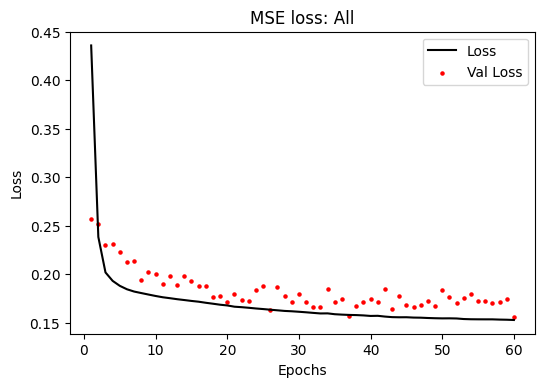

In [11]:
plt.figure(dpi=100)
plt.plot(epochs, train_loss, color = 'black',label = 'Loss')
plt.scatter(epochs, train_val_loss, s = 5, color = 'red', label = 'Val Loss')
plt.legend()  
plt.title('MSE loss: All')
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [12]:
#Prediction
prediction = my_model.predict(x_test)

10/10 [==============================] - 0s 1ms/step


In [13]:
#Scores
MSE = mean_squared_error(prediction, y_test)
MSE

0.14221868432108756

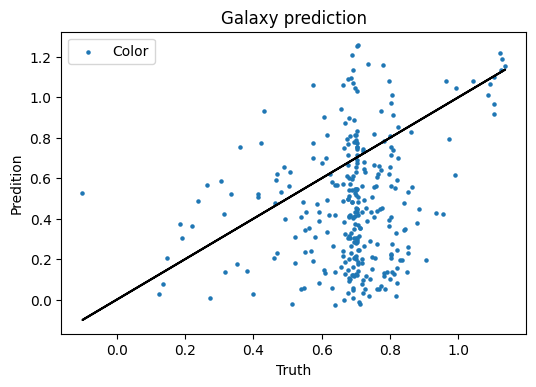

In [14]:
plt.figure(dpi = 100)
plt.title('Galaxy prediction')
plt.scatter(y_test[:, 0], prediction[:, 0], s = 5, color = 'C0', label = 'Color')
plt.xlabel(r'Truth')
plt.plot(y_test[:, 0], y_test[:, 0], color = 'black')
plt.ylabel(r'Predition')
plt.legend()

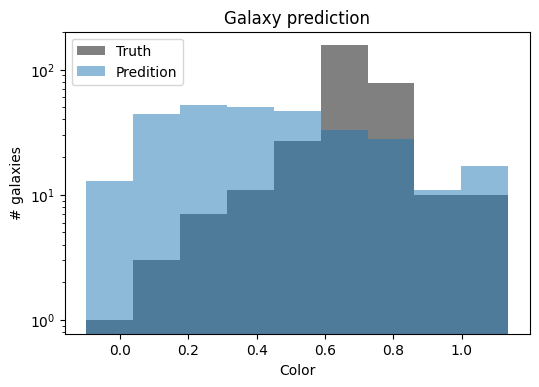

In [15]:
plt.figure(dpi = 100)
plt.title('Galaxy prediction')

bins = np.linspace(np.min(y_test[:, 0]), np.max(y_test[:, 0]), 10)
plt.hist(y_test[:, 0], bins = bins, color = 'gray', label = 'Truth')
plt.hist(prediction[:, 0], bins = bins, color = 'C0', alpha = 0.5, label = 'Predition')
plt.xlabel(r'Color')
plt.ylabel(r'# galaxies')
plt.legend()
plt.yscale('log')